In [4]:
import tensorflow as tf
import keras.layers as tfkl
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os
import matplotlib.pyplot as plt

In [5]:
# Check GPU Avaialability
tf.test.is_built_with_cuda()

True

In [6]:
# Constants for the model
NUM_CLASSES = 5
CLASSES = ["Angry", "Happy", "Neutral", "sad", "Suprise"]
IMG_ROWS = 48
IMG_COLS = 48

num_train_samples = 24176
num_validation_samples = 3006

# Hyperparams
batch_size = 64

In [7]:
# Data Directory
TRAIN_DATA_DIR = r"C:\Users\markd\Documents\fer2013\train"
VAL_DATA_DIR = r"C:\Users\markd\Documents\fer2013\validation"

In [8]:
# Image augmentation
# only augment the training set but normalize both inputs
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    width_shift_range=0.4,
    height_shift_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Define Generators
train_generator = train_datagen.flow_from_directory(
 TRAIN_DATA_DIR,
 color_mode='grayscale',
 target_size=(IMG_ROWS,IMG_COLS),
 batch_size=batch_size,
 class_mode='categorical',
 shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
 VAL_DATA_DIR,
 color_mode='grayscale',
 target_size=(IMG_ROWS,IMG_COLS),
 batch_size=batch_size,
 class_mode='categorical',
 shuffle=True)


Found 24256 images belonging to 5 classes.
Found 3006 images belonging to 5 classes.


In [10]:
# Ploting helper functions
def plot_loss(hist):
    plt.title("")
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.xlabel("# Epochs")
    plt.ylabel("Loss")
    plt.show()

# Plot results
def plot_acc(hist):
    plt.title("")
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.xlabel("# Epochs")
    plt.ylabel("accuracy")
    plt.show()


In [11]:
# Define Sequential Model
model = Sequential([
    ## CONV LAYERS 
    # Block 1
    Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal', input_shape=(IMG_ROWS,IMG_COLS,1)),
    Activation('elu'),
    BatchNormalization(),
    Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Dropout(0.3),

    Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),

    # Block 2
    Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Dropout(0.3),

    Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),

    # Block 3
    Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Dropout(0.3),

    Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),

    # Block 4
    Conv2D(512,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Conv2D(512,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Dropout(0.3),

    Conv2D(512,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),

    ## FC LAYERS
    # Block 5
    Flatten(),
    Dense(128,kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Dropout(0.5),

    # Block 6
    Flatten(),
    Dense(64,kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Dropout(0.5),

    # Block 7
    Dense(NUM_CLASSES,kernel_initializer='he_normal'),
    Activation('softmax'),
])

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               loss='categorical_crossentropy',
               metrics='accuracy')

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                        

In [32]:
# Fit data
epochs = 25
history = model.fit_generator(
    train_generator,
    steps_per_epoch = num_train_samples // batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = num_validation_samples // batch_size, 
)

Epoch 1/75
  1/377 [..............................] - ETA: 45s - loss: 0.9514 - accuracy: 0.6719

C:\Users\markd\AppData\Local\Temp\ipykernel_14076\704300924.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


377/377 [==============================] - 30s 79ms/step - loss: 1.0317 - accuracy: 0.5953 - val_loss: 1.4029 - val_accuracy: 0.5645
Epoch 2/75
377/377 [==============================] - 30s 79ms/step - loss: 1.0244 - accuracy: 0.6025 - val_loss: 1.7237 - val_accuracy: 0.5598
Epoch 3/75
377/377 [==============================] - 30s 79ms/step - loss: 1.0212 - accuracy: 0.6041 - val_loss: 1.5186 - val_accuracy: 0.5931
Epoch 4/75
377/377 [==============================] - 30s 79ms/step - loss: 1.0108 - accuracy: 0.6062 - val_loss: 1.1739 - val_accuracy: 0.6084
Epoch 5/75
377/377 [==============================] - 30s 80ms/step - loss: 1.0049 - accuracy: 0.6113 - val_loss: 1.1653 - val_accuracy: 0.6128
Epoch 6/75
377/377 [==============================] - 30s 81ms/step - loss: 1.0004 - accuracy: 0.6159 - val_loss: 1.4927 - val_accuracy: 0.5744
Epoch 7/75
377/377 [==============================] - 30s 81ms/step - loss: 0.9938 - accuracy: 0.6120 - val_loss: 1.3832 - val_accuracy: 0.5795
Epo

KeyboardInterrupt: 

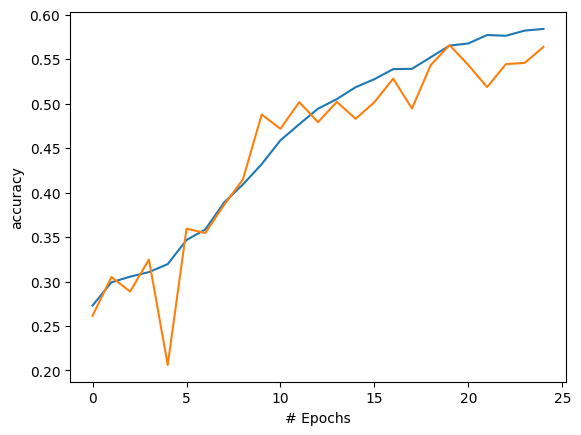

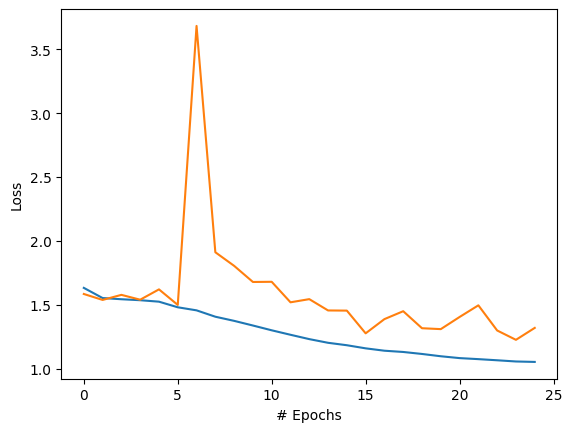

In [ ]:
plot_acc(history)
plot_loss(history)

In [15]:
# ResNet 50 Residual Blocks
def identity_block(X, f, filters, training=True, initializer = tf.keras.initializers.random_uniform):
    """
    Implementation of the identity block
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    training -- True: Behave in training mode
                False: Behave in inference mode
    initializer -- to set up the initial weights of a layer. Equals to random uniform initializer
    
    Returns:
    X -- output of the identity block, tensor of shape (m, n_H, n_W, n_C)
    """
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # saving shortcut value
    X_shortcut = X
    
    # First component
    X = tfkl.Conv2D(filters = F1, kernel_size = 1, strides = (1,1), padding = 'valid', kernel_initializer = initializer(seed=0))(X)
    X = tfkl.BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = tfkl.Activation('relu')(X)
    
    ## Second component 
    X = tfkl.Conv2D(filters = F2, kernel_size = f, strides = (1,1), padding= 'same', kernel_initializer = initializer(seed=0))(X)
    X = tfkl.BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = tfkl.Activation('relu')(X)

    ## Third component
    X = tfkl.Conv2D(filters = F3, kernel_size = 1, strides = (1,1), padding= 'valid', kernel_initializer = initializer(seed=0))(X)
    X = tfkl.BatchNormalization(axis = 3)(X, training = training) # Default axis

    ## Add shortcut value back into main path
    X = tfkl.Add()([X, X_shortcut])
    X = tfkl.Activation('relu')(X) 

    return X

In [43]:
def convolutional_block(X, f, filters, s = 2, training=True, initializer=tf.keras.initializers.glorot_uniform):
    """
    Implementation of the convolutional block
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    s -- Integer, specifying the stride to be used
    training -- True: Behave in training mode
                False: Behave in inference mode
    initializer -- to set up the initial weights of a layer. Equals to Glorot uniform initializer, 
                   also called Xavier uniform initializer.
    
    Returns:
    X -- output of the convolutional block, tensor of shape (m, n_H, n_W, n_C)
    """
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X

    ##### MAIN PATH #####
    # First component of main path
    X = tfkl.Conv2D(filters = F1, kernel_size = 1, strides = (s, s), padding='valid', kernel_initializer = initializer(seed=0))(X)
    X = tfkl.BatchNormalization(axis = 3)(X, training=training)
    X = tfkl.Activation('relu')(X)

    ## Second component of main path
    X = tfkl.Conv2D(filters = F2, kernel_size = f, strides = (1, 1), padding='same', kernel_initializer = initializer(seed=0))(X)
    X = tfkl.BatchNormalization(axis = 3)(X, training=training)
    X = tfkl.Activation('relu')(X) 

    ## Third component of main path 
    X = tfkl.Conv2D(filters = F3, kernel_size = 1, strides = (1, 1), padding='valid', kernel_initializer = initializer(seed=0))(X)
    X = tfkl.BatchNormalization(axis = 3)(X, training=training)
    
    ##### SHORTCUT PATH #####
    X_shortcut = tfkl.Conv2D(filters = F3, kernel_size = 1, strides = (s, s), padding='valid', kernel_initializer = initializer(seed=0))(X_shortcut)
    X_shortcut = tfkl.BatchNormalization(axis = 3)(X_shortcut, training=training)

    # Add shortcut value to main path
    X = tfkl.Add()([X, X_shortcut])
    X = tfkl.Activation('relu')(X)
    
    return X

In [57]:
def modified_ResNet50(input_shape = (48, 48, 1), classes = NUM_CLASSES, dropout=0.2):
    """
    Stage-wise implementation of the architecture of the popular ResNet50, with 5th block removed 

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes
    dropout -- float (0-1), dropout chance

    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input as a tensor with shape input_shape
    X_input = tfkl.Input(input_shape)
    X = tfkl.ZeroPadding2D((3, 3))(X_input)

    # Block 1
    X = tfkl.Conv2D(64, (5,5), strides=2)(X)  # 16 x 16 x 64
    X = tfkl.BatchNormalization(axis = 3)(X)
    X = tfkl.Activation('relu')(X)
    X = tfkl.MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = tfkl.Dropout(dropout)(X)

    # Block 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1)
    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])
    X = tfkl.Dropout(dropout)(X)

    # Block 3
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], s = 2)
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])
    X = tfkl.Dropout(dropout)(X)

    # Block 4
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], s = 2)
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = tfkl.Dropout(dropout)(X)  

    # Block 5
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], s = 1)
    X = identity_block(X, 3, [512, 512, 2048])
    X = identity_block(X, 3, [512, 512, 2048])
    X = tfkl.Dropout(dropout)(X)  

    # FC Block
    X = tfkl.AveragePooling2D()(X)
    X = tfkl.Flatten()(X)
    X = tfkl.Dense(classes, activation='softmax', kernel_initializer = tf.keras.initializers.glorot_uniform(seed=0))(X)

    # Create model
    model = tf.keras.Model(inputs = X_input, outputs = X)
    return model

In [45]:
resnet_model = modified_ResNet50(dropout=0.2)

In [46]:
resnet_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 zero_padding2d_7 (ZeroPadding2  (None, 54, 54, 1)   0           ['input_8[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_328 (Conv2D)            (None, 25, 25, 64)   1664        ['zero_padding2d_7[0][0]']       
                                                                                                  
 batch_normalization_330 (Batch  (None, 25, 25, 64)  256         ['conv2d_328[0][0]']       

In [47]:
resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               loss='categorical_crossentropy',
               metrics='accuracy')

In [55]:
# Fit data
epochs = 50
history = resnet_model.fit_generator(
    train_generator,
    steps_per_epoch = num_train_samples // batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = num_validation_samples // batch_size, 
)

Epoch 1/50


C:\Users\markd\AppData\Local\Temp\ipykernel_32848\3654479111.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_model.fit_generator(


377/377 [==============================] - 21s 55ms/step - loss: 0.9425 - accuracy: 0.6350 - val_loss: 1.0986 - val_accuracy: 0.6128
Epoch 2/50
377/377 [==============================] - 20s 53ms/step - loss: 0.9452 - accuracy: 0.6325 - val_loss: 1.0997 - val_accuracy: 0.6138
Epoch 3/50
377/377 [==============================] - 21s 54ms/step - loss: 0.9477 - accuracy: 0.6304 - val_loss: 1.1304 - val_accuracy: 0.6084
Epoch 4/50
377/377 [==============================] - 20s 52ms/step - loss: 0.9486 - accuracy: 0.6301 - val_loss: 1.1253 - val_accuracy: 0.6118
Epoch 5/50
377/377 [==============================] - 20s 52ms/step - loss: 0.9479 - accuracy: 0.6288 - val_loss: 1.1116 - val_accuracy: 0.6077
Epoch 6/50
377/377 [==============================] - 19s 51ms/step - loss: 0.9392 - accuracy: 0.6313 - val_loss: 1.1290 - val_accuracy: 0.6236
Epoch 7/50
377/377 [==============================] - 20s 52ms/step - loss: 0.9346 - accuracy: 0.6387 - val_loss: 1.1547 - val_accuracy: 0.6158
Epo

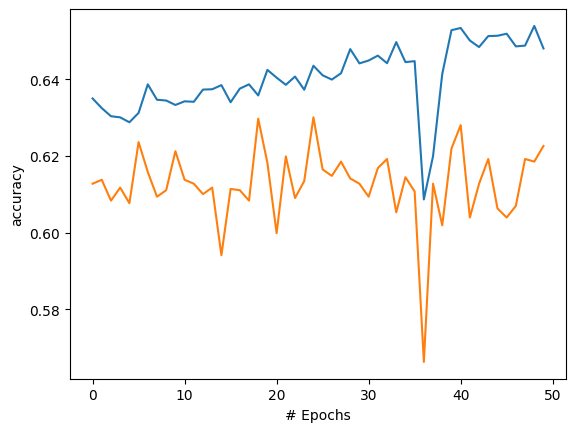

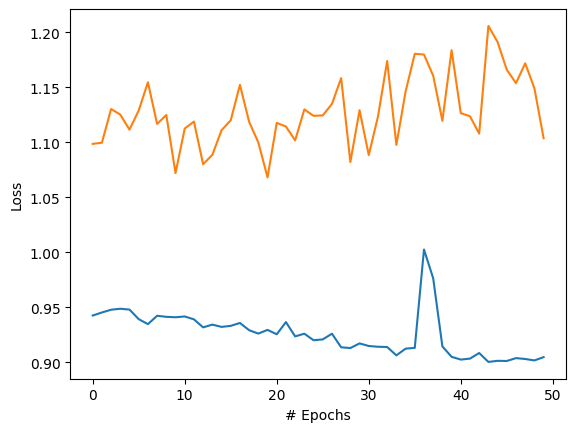

In [56]:
plot_acc(history)
plot_loss(history)

In [58]:
resnet_model2 = modified_ResNet50(dropout=0.3)
resnet_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               loss='categorical_crossentropy',
               metrics='accuracy')
resnet_model2.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 zero_padding2d_8 (ZeroPadding2  (None, 54, 54, 1)   0           ['input_9[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_381 (Conv2D)            (None, 25, 25, 64)   1664        ['zero_padding2d_8[0][0]']       
                                                                                                  
 batch_normalization_383 (Batch  (None, 25, 25, 64)  256         ['conv2d_381[0][0]']       

Epoch 1/100


C:\Users\markd\AppData\Local\Temp\ipykernel_32848\636140095.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = resnet_model2.fit_generator(


377/377 [==============================] - 19s 51ms/step - loss: 1.1698 - accuracy: 0.5284 - val_loss: 1.1473 - val_accuracy: 0.5686
Epoch 2/100
377/377 [==============================] - 22s 59ms/step - loss: 1.1179 - accuracy: 0.5526 - val_loss: 1.1627 - val_accuracy: 0.5791
Epoch 3/100
377/377 [==============================] - 21s 56ms/step - loss: 1.0888 - accuracy: 0.5690 - val_loss: 1.1145 - val_accuracy: 0.5866
Epoch 4/100
377/377 [==============================] - 21s 56ms/step - loss: 1.0570 - accuracy: 0.5801 - val_loss: 1.1238 - val_accuracy: 0.5842
Epoch 5/100
377/377 [==============================] - 19s 50ms/step - loss: 1.0408 - accuracy: 0.5893 - val_loss: 1.1281 - val_accuracy: 0.5992
Epoch 6/100
377/377 [==============================] - 19s 51ms/step - loss: 1.0304 - accuracy: 0.5948 - val_loss: 1.1287 - val_accuracy: 0.6002
Epoch 7/100
377/377 [==============================] - 19s 50ms/step - loss: 1.0186 - accuracy: 0.5971 - val_loss: 1.1112 - val_accuracy: 0.59

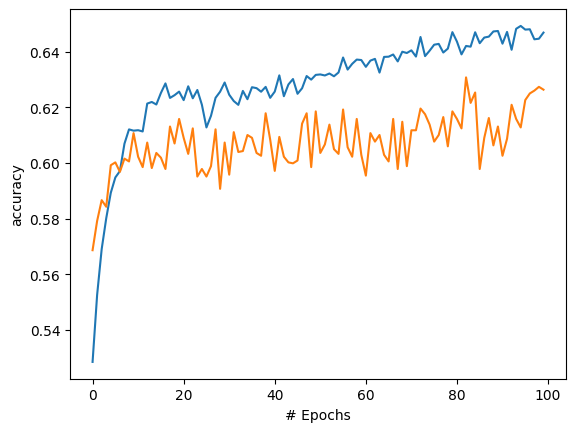

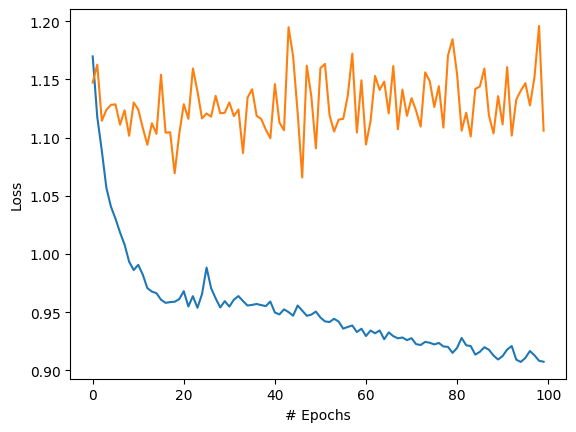

In [61]:
# Fit data
epochs = 100
history2 = resnet_model2.fit_generator(
    train_generator,
    steps_per_epoch = num_train_samples // batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = num_validation_samples // batch_size, 
)

plot_acc(history2)
plot_loss(history2)


In [ ]:
# DenseNet Implimentation
# Dense Block
def dense_block(X, f, filters, training=True, initializer = tf.keras.initializers.random_uniform):
    """
    Implementation of the dense block
    ONE LAYER (4 TOTAL): INPUT -> BN -> RELU -> 3x3 CONV
    Each layer is connnected to all layers after itself within the block
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    training -- True: Behave in training mode
                False: Behave in inference mode
    initializer -- to set up the initial weights of a layer. Equals to random uniform initializer
    
    Returns:
    X -- output of the dense block, tensor of shape (m, n_H, n_W, n_C)
    """
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # saving shortcut value
    X_shortcut = X
    
    # First component
    

    return X